## Shape Recognition: Overview and Explanation
### What is Shape Recognition?
Shape recognition is an important computer vision technique used to detect and classify geometric shapes in an image. It is widely used in robotics, object detection, industrial automation, and pattern recognition.

#### How It Works:

1. Convert the image to grayscale.

2. Apply thresholding to create a binary image.

3. Detect contours in the image.

4. Approximate each contour’s shape using polygonal curve approximation.

5. Classify shapes based on the number of sides and aspect ratio (for quadrilaterals).

6. Draw bounding boxes and label shapes on the image.

Common Applications: ✔ Identifying geometric objects
✔ Detecting traffic signs in autonomous vehicles
✔ Industrial quality control
✔ Optical character recognition (OCR)

### 1. Importing Required Libraries

In [75]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


cv2 (OpenCV) → Used for image processing and shape detection.

numpy → Handles mathematical operations.

matplotlib.pyplot → Displays images.

### 2. Loading and Preprocessing the Image

In [67]:
image = cv2.imread("shapes1.png")

In [68]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


#### Explanation:

- cv2.imread("shapes1.png") → Loads the image.

- cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) → Converts the image to grayscale to simplify processing.

#### Why Convert to Grayscale?
Grayscale images contain only intensity values (0 to 255), making it easier to detect edges and contours.

### 3. Applying Thresholding

In [69]:
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#### Explanation:

Thresholding converts the image into black (0) and white (255) regions.

cv2.THRESH_BINARY → Pixels above 127 become white, others become black.

#### Why Use Thresholding?
It helps to separate objects from the background, making contours easier to detect.

### 4. Finding Contours

In [70]:
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#### Explanation:

- cv2.findContours() → Finds object boundaries in the binary image.

- cv2.RETR_TREE → Retrieves all contours in a hierarchical tree.

- cv2.CHAIN_APPROX_SIMPLE → Compresses contour points to save memory.

### 5. Iterating Through Each Contour


In [ ]:
for contour in contours:    
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    num_sides = len(approx)
    shape = "unknown"


#### Explanation:

cv2.approxPolyDP() → Approximates the contour shape by reducing the number of points.

cv2.arcLength(contour, True) → Computes the perimeter of the contour.

num_sides = len(approx) → Counts the number of sides in the approximated shape.

#### Why Approximate Contours?
This helps reduce the number of points to identify standard geometric shapes.

### 6. Calculating the Shape’s Center

In [ ]:
M = cv2.moments(contour)
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
else:
    cx, cy = 0, 0


#### Explanation:

cv2.moments() → Calculates shape properties like area, centroid, and moments.

cx, cy → Compute the center (centroid) of the shape for text labeling.

### 7. Classifying Shapes Based on Sides


In [ ]:
if num_sides == 3:
    shape = "Triangle"
    color = (0, 255, 0)
elif num_sides == 4:
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = float(w) / h
    if 0.95 <= aspect_ratio <= 1.05:
        shape = "Square"
        color = (255, 0, 0)
    else:
        shape = "Rectangle"
        color = (0, 255, 255)
elif num_sides > 8:
    shape = "Circle"
    color = (255, 0, 255)


#### Explanation:
```
num_sides == 3 → Identifies triangles.

num_sides == 4 → Identifies squares and rectangles based on aspect ratio.

num_sides > 8 → Identifies circles (more sides = smoother shape).

 Why Check Aspect Ratio?

Square → Aspect ratio ≈ 1

Rectangle → Aspect ratio ≠ 1
```

### 8. Drawing the Contours and Labels

In [ ]:
cv2.drawContours(image, [contour], 0, color, 3)
cv2.putText(image, shape, (cx - 30, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)


#### Explanation:

cv2.drawContours() → Draws a shape outline with the assigned color.

cv2.putText() → Adds a label to the detected shape.

### 9. Displaying the Result

In [74]:
cv2.imshow("shape detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

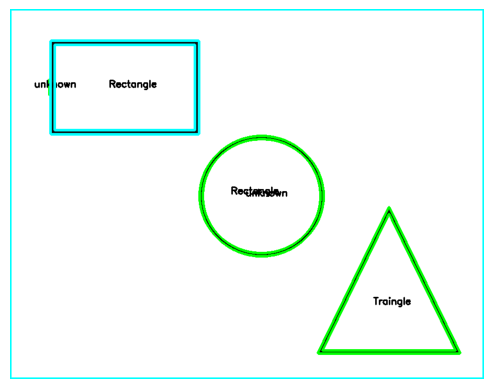

In [77]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

#### Explanation:
```
cv2.imshow() → Displays the image with detected shapes.

cv2.waitKey(0) → Waits for a key press before closing the window.

plt.imshow() → Displays the final image using Matplotlib.
```